![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: data management

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/cafawo/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/cafawo/FinancialDataAnalytics/discussions

### Task: 

Use Deribit's `"/public/get_tradingview_chart_data"` API endpoint to download historical price data for **"BTC-PERPETUAL"** with a resolution of $60$ minutes, reaching as far back as possible.

Hint: https://docs.deribit.com/#public-get_tradingview_chart_data

In [8]:
import requests
import pandas as pd
import time
import sqlite3


#documentation: https://docs.deribit.com/?python#public-get-tradingview-chart-data

def get_deribit_data(instrument_name, resolution, start_timestamp, end_timestamp):
    url = "https://www.deribit.com/api/v2/public/get_tradingview_chart_data"
    params = {
        'instrument_name': instrument_name,
        'resolution': resolution,
        'start_timestamp': start_timestamp,
        'end_timestamp': end_timestamp
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data['result']

# Set parameters
instrument_name = "BTC-PERPETUAL"
resolution = "60"  # 60 minutes

# Deribit's earliest available data timestamp
start_timestamp = 0
end_timestamp = int(time.time() * 1000)  # Current time in milliseconds

# Fetch the data
data = get_deribit_data(instrument_name, resolution, start_timestamp, end_timestamp)


### Task: 

Create a Pandas data frame called "ohlc" with the price data from above. Add the following columns:
```Python
ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
ohlc['instrument_name'] = "BTC-PERPETUAL"
ohlc['resolution'] = 60
```

Save `ohlc` into a table of the same name inside a database called "07_datam.db".


In [10]:
# Convert to DataFrame
ohlc = pd.DataFrame(data)
ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
ohlc['instrument_name'] = "BTC-PERPETUAL"
ohlc['resolution'] = 60
ohlc.drop(columns=['ticks'], inplace=True)

# Connect to the SQLite database (it will be created if it doesn't exist)
conn = sqlite3.connect('07_datam.db')

# Save the DataFrame to a table named 'BTC_PERPETUAL_Historical_Price_Data'
ohlc.to_sql('ohlc', conn, if_exists='replace', index=True)

# Close the connection
conn.close()


display(ohlc)

,volume,status,open,low,high,cost,close,timestamp,instrument_name,resolution
0,687.118571,ok,35243.0,35115.5,35308.5,24199770.0,35287.0,2023-11-02 06:00:00,BTC-PERPETUAL,60
1,544.470741,ok,35283.0,35253.5,35400.0,19230440.0,35324.0,2023-11-02 07:00:00,BTC-PERPETUAL,60
2,1140.039870,ok,35324.0,35131.0,35365.5,40197920.0,35362.5,2023-11-02 08:00:00,BTC-PERPETUAL,60
3,570.139842,ok,35360.0,35284.5,35451.5,20167800.0,35416.5,2023-11-02 09:00:00,BTC-PERPETUAL,60
4,385.947976,ok,35416.5,35376.0,35522.5,13679590.0,35413.5,2023-11-02 10:00:00,BTC-PERPETUAL,60
...,...,...,...,...,...,...,...,...,...,...
4996,498.766646,ok,68293.0,68210.5,68838.0,34199650.0,68544.5,2024-05-28 10:00:00,BTC-PERPETUAL,60
4997,196.819125,ok,68545.0,68231.0,68608.0,13462050.0,68334.0,2024-05-28 11:00:00,BTC-PERPETUAL,60
4998,274.313336,ok,68338.5,68118.5,68510.0,18744820.0,68163.5,2024-05-28 12:00:00,BTC-PERPETUAL,60
4999,632.424319,ok,68163.5,67623.0,68441.0,42980030.0,67729.5,2024-05-28 13:00:00,BTC-PERPETUAL,60


### Task: 

Create a Python `class DataHandler` that connects to 07_datam.db. The class should have functions that:
* download and save,
* select and return, and
* display data as a plot (e.g. the last price over time).

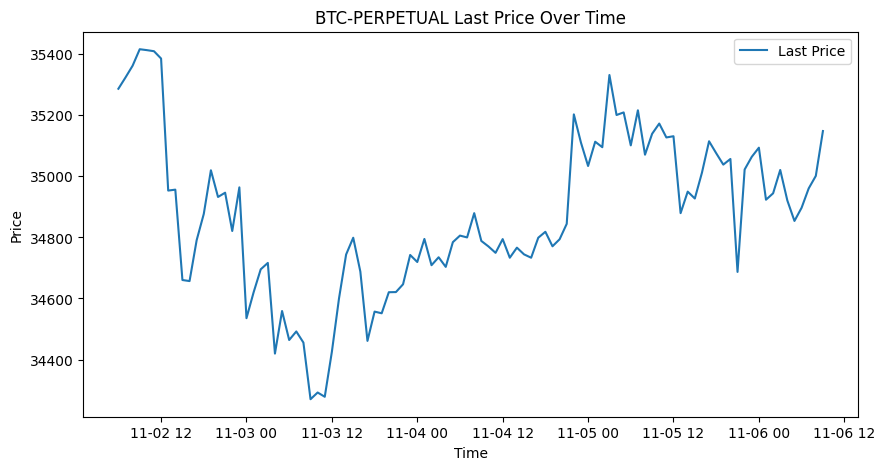

In [14]:
import requests
import pandas as pd
import time
import sqlite3

class DataHandler:
    def __init__(self, db_name):
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        
    def download_and_save(self, instrument_name="BTC-PERPETUAL", resolution="60"):                                  ###siehe Aufgabe 1
        def get_deribit_data(instrument_name, resolution, start_timestamp, end_timestamp):
            url = "https://www.deribit.com/api/v2/public/get_tradingview_chart_data"
            params = {
                'instrument_name': instrument_name,
                'resolution': resolution,
                'start_timestamp': start_timestamp,
                'end_timestamp': end_timestamp
            }
            response = requests.get(url, params=params)
            data = response.json()
            return data['result']
        
        start_timestamp = 0
        end_timestamp = int(time.time() * 1000)
        
        data = get_deribit_data(instrument_name, resolution, start_timestamp, end_timestamp)
        
        ohlc = pd.DataFrame(data)
        ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
        ohlc['instrument_name'] = "BTC-PERPETUAL"
        ohlc['resolution'] = 60
        ohlc.drop(columns=['ticks'], inplace=True)
        
        ohlc.to_sql('ohlc', self.conn, if_exists='replace', index=True)
        
    def select_and_return(self, table_name, limit=None):
        query = f"SELECT * FROM {table_name}"
        if limit:
            query += f" LIMIT {limit}"
        ohlc = pd.read_sql(query, self.conn)
        ohlc['timestamp'] = pd.to_datetime(ohlc['timestamp'])
        ohlc.set_index('timestamp', inplace=True)
        return ohlc
    
    def display_plot(self, ohlc):
        plt.figure(figsize=(10, 5))
        plt.plot(ohlc.index, ohlc['close'], label='Last Price')
        plt.title('BTC-PERPETUAL Last Price Over Time')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# Usage Example:
# Initialize the DataHandler
data_handler = DataHandler('07_datam.db')

# Download and save the data
data_handler.download_and_save()

# Select and return data from the database
ohlc = data_handler.select_and_return('ohlc', limit=100)

# Display the data as a plot
data_handler.display_plot(ohlc)
